In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv('credit_card_fraud_dataset.csv')

In [4]:
df.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

Exploratory Data Analysis (EDA)

In [5]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


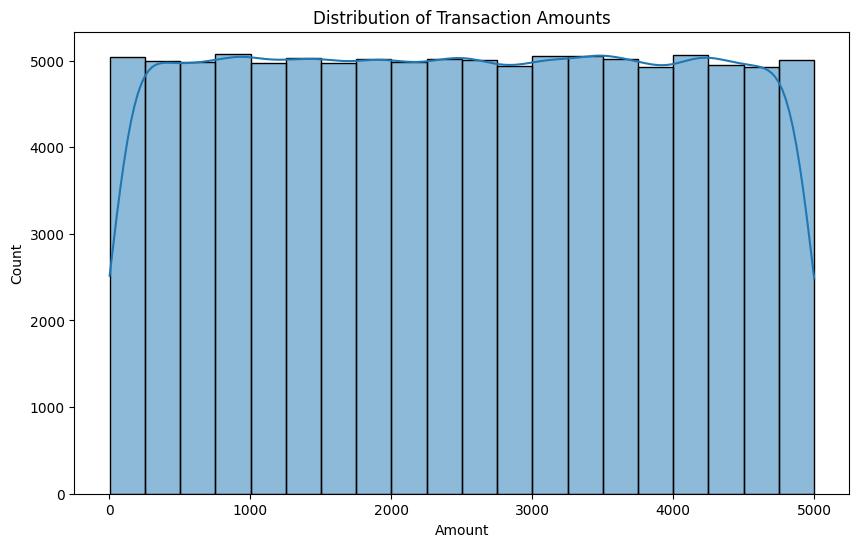

In [7]:
# Distribution of Transaction Amounts
plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], kde=True, bins=20)
plt.title('Distribution of Transaction Amounts')
plt.show()

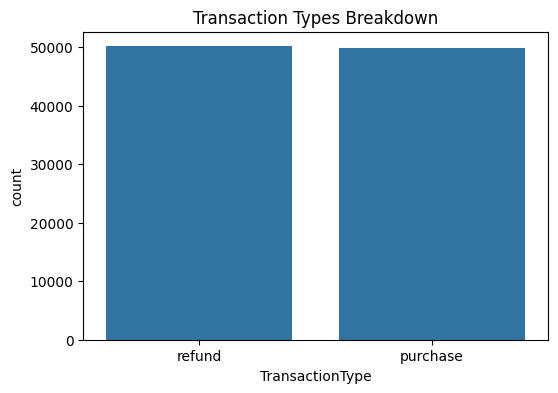

In [6]:
# Transaction types breakdown
plt.figure(figsize=(6,4))
sns.countplot(x='TransactionType', data=df)
plt.title('Transaction Types Breakdown')
plt.show()

In [10]:
df['TransactionType'].value_counts()

TransactionType
1    50131
0    49869
Name: count, dtype: int64

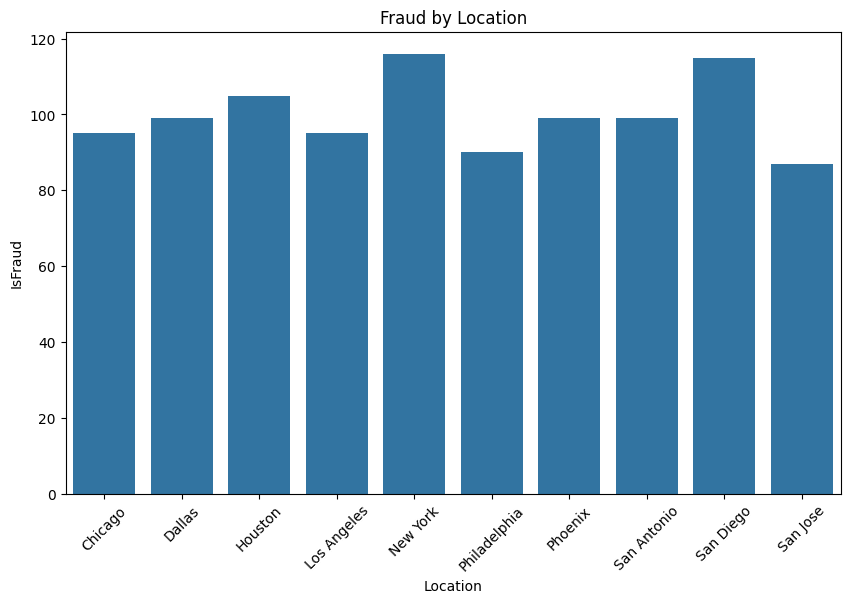

In [7]:
# Fraud by Location
fraud_by_location = df.groupby('Location')['IsFraud'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Location', y='IsFraud', data=fraud_by_location)
plt.title('Fraud by Location')
plt.xticks(rotation=45)
plt.show()

New York has the highest number of fraudulent transactions, indicating it could be a hotspot for fraud.

San Diego also shows a high number of fraud cases, nearly as high as New York.

San Jose has the lowest recorded fraud cases among the locations listed.

Pattern Recognition

In [8]:
# converting object data type to numeric
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
obj = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

for i in range(0, obj.shape[1]):
    obj.iloc[:,i] = le.fit_transform(obj.iloc[:,i])

obj = obj.astype("int")
df = pd.concat([obj, num], axis=1)

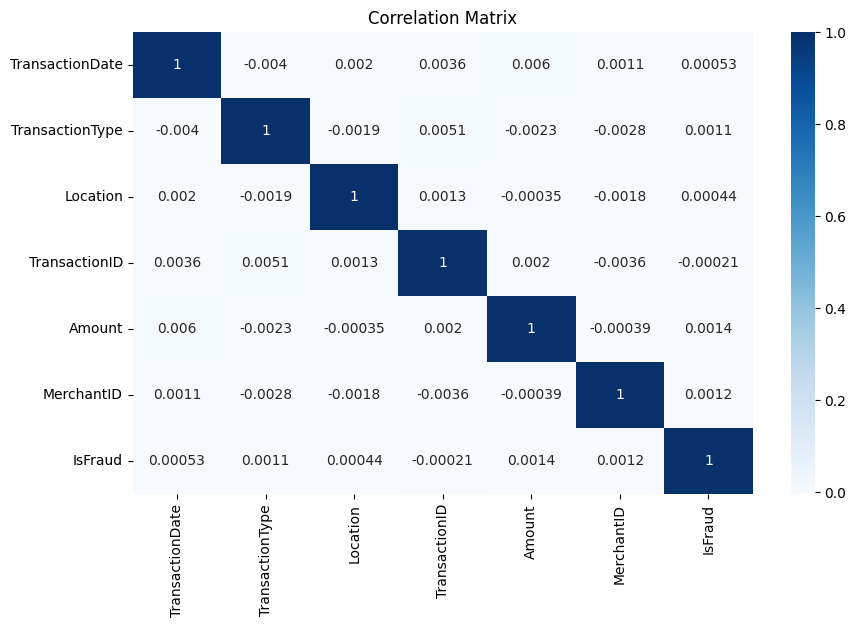

In [9]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

Most variables show very low correlation with each other and with IsFraud, implying that fraud detection based on linear relationships might be limited.

Amount has a slightly higher, though still minimal, correlation with IsFraud compared to other variables.

This weak correlation across features suggests that more complex, non-linear modeling techniques may be necessary to effectively identify fraud.

Data Preprocessing for Machine Learning

In [9]:
# Encode categorical variables (TransactionType, Location)
label_encoder = LabelEncoder()
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
df['Location'] = label_encoder.fit_transform(df['Location'])

In [11]:
# Splitting the data
X = df.drop(['TransactionID', 'TransactionDate', 'IsFraud'], axis=1)  # Features
y = df['IsFraud']  # Target variable

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Fraud Detection Modeling

In [13]:
# Fraud Detection Modeling
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Predictions
y_pred = rf_model.predict(X_test)

In [15]:
# Evaluating the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[29682     4]
 [  314     0]]


In [16]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29686
           1       0.00      0.00      0.00       314

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.98     30000



Feature Importance

In [17]:
# Feature Importance Analysis
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

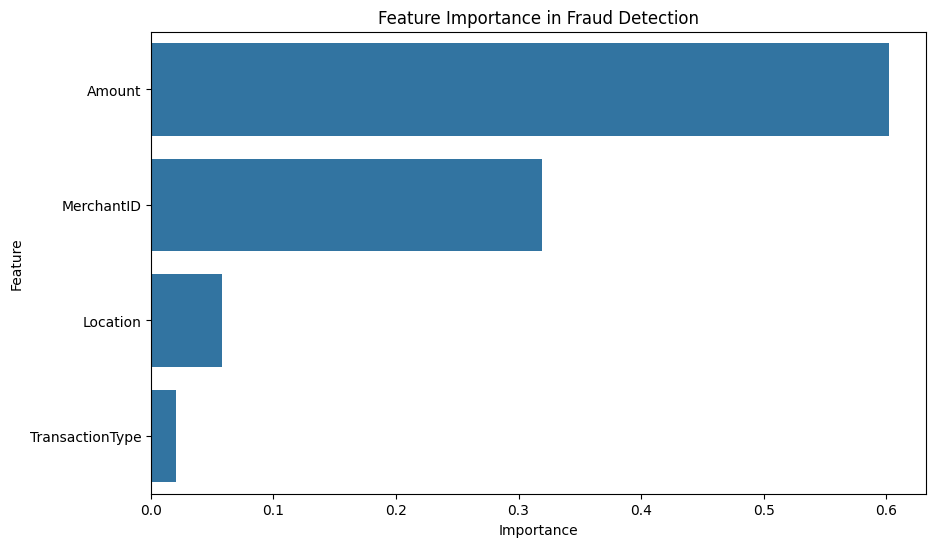

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Fraud Detection')
plt.show()

Amount is the most important feature, suggesting that larger transaction amounts are more likely to be flagged as potentially fraudulent.

MerchantID also has a notable importance, indicating that certain merchants may have a higher association with fraud.

Location has a moderate level of importance, possibly due to specific regions having higher fraud risk.

TransactionType has the least importance in the model, suggesting that distinguishing between purchases and refunds alone might not be as critical in detecting fraud.

In [19]:
# Evaluate model performance with key metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9894
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
